<a href="https://colab.research.google.com/github/i2mmmmm/Study/blob/main/ML/2.%20%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 전처리

In [1]:
import pandas as pd

# 예시 데이터 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 30, None, 28, 35],
    'Height': [160, 175, 180, None, 155],
    'Weight': [55, 70, 80, 65, 50],
    'Score': [75, 82, 90, 88, None]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# CSV 파일로 저장
df.to_csv('example_data.csv', index=False)

###1. 데이터 불러오기

In [7]:
# csv 파일 불러오기
data = pd.read_csv('example_data.csv')

# 데이터 시작 확인
print(data.head())

      Name   Age  Height  Weight  Score
0    Alice  25.0   160.0      55   75.0
1      Bob  30.0   175.0      70   82.0
2  Charlie   NaN   180.0      80   90.0
3    David  28.0     NaN      65   88.0
4      Eva  35.0   155.0      50    NaN


###2. 데이터 결측치 처리

In [8]:
# 결측치 확인
print(data.isnull().sum())

# 결측치 제거
# data = data.dropna()

# 결측치 대체
data = data.fillna(data.mean())

print(data.head())

Name      0
Age       1
Height    1
Weight    0
Score     1
dtype: int64
      Name   Age  Height  Weight  Score
0    Alice  25.0   160.0      55  75.00
1      Bob  30.0   175.0      70  82.00
2  Charlie  29.5   180.0      80  90.00
3    David  28.0   167.5      65  88.00
4      Eva  35.0   155.0      50  83.75


<ipython-input-8-936fc280e4ff>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


### 3. 이상치 처리

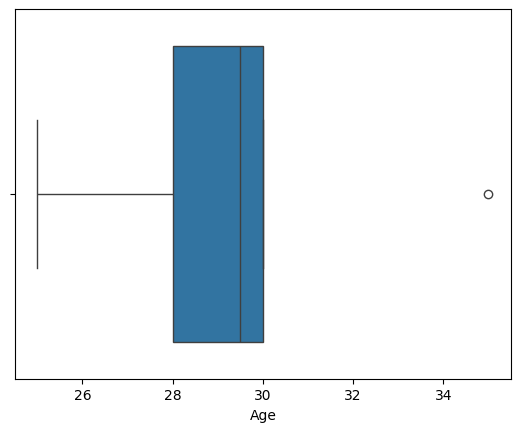

In [12]:
# 이상치 확인
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['Age'])
plt.show

Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Age'] >= Q1 - 1.5 * IQR) & (data['Age'] <= Q3 + 1.5 * IQR)]

### 4. 데이터 스케일링

In [14]:
from sklearn.preprocessing import StandardScaler

# StandardScaler를 사용한 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('Name',axis=1))

### 5. 특성 엔지니어링

In [20]:
# 특성 엔지니어링 (키와 몸무게를 더한 새로운 열 생성)
data = data.copy()
data['Height_Weight_Sum'] = data['Height'] + data['Weight']

### 6. 데이터 분할

In [22]:
from sklearn.model_selection import train_test_split

X = data.drop(['Name', 'Score'], axis=1)
y = data['Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)